# Case Study: How Can a Wellness Technology Company Play It Smart?

# About
Bellabeat is a high-tech women-centric company that manufactures health-focused smart products. They offer different smart devices that collect data on activity, sleep, stress, and reproductive health to empower women with knowledge about their own health and habits.

The main focus of this case is to analyze smart devices fitness data and determine how it could help unlock new growth opportunities for Bellabeat. We will focus on one of Bellabeat’s products: Bellabeat app.

The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products

# Ask
Here are the key questions will guide the analysis:
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

# Prepare


The data source used for this case study is [FitBit Fitness Tracker Data](https://www.kaggle.com/arashnic/fitbit). This dataset was downloaded from Kaggle where it was uploaded by Möbius.

We can ensure that this dataset is open-source and have the CC0: Public Domain License which means we can copy, modify, distribute and perform the work, even for commercial purposes, all without asking permission.

This Kaggle data set contains personal fitness tracker from 33 users. 33 eligible users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

The dataset is a collection of 18 .csv files. 15 in long format, 3 in wide format.

Lastly, the sample size itself could create a sample bias. While a sample size of 30 will hold up within the Central Limit Theorem, a larger sample size will be more representative of the population and would increase the confidence interval. Additionally, since there were no demographic information collected it will be hard to see if we have a true representation of a national or global population. This lack of demographic information will also limit recommendations on the target audience (including gender, location, age and job status) and where to market to them. Considering that Bellabeat is primarily targeted to women and individuals who menstruate, having demographics would have bolstered any recommendations after analysis


# Process

Let's use R programming language as it is effective in all steps of data analysis and use Tableau to create some eye-catching visuals.

### Loading the necessary packages

In [1]:
library(tidyverse)
library(ggplot2)
library(lubridate)
library(janitor)
library(dplyr)
library(skimr)
library(tidyr)
library(here)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


here() starts at /kaggle/working



### Importing the data

In [2]:
daily_activity <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
# No need to import the dailyCalories, dailyIntensities, dailySteps since dailyActivity is already includes them
daily_sleep <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
hourly_calories <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourly_intensities <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourly_steps <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
# There is no data data like hourlyActivity, so we should use hourlyCalories, hourlyIntensities, hourlySteps

# Also, there is data of calories, intensities and steps for each minute but it would be too specific for my analysis, so I don't use it.
weight_log_info <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
# Weight data of users may also be useful


Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or s

All the necessary data is imported. Now, let's take a look at them.

In [3]:
glimpse(daily_activity)
head(daily_activity)

glimpse(daily_sleep)
head(daily_sleep)

glimpse(hourly_calories)
head(hourly_calories)

glimpse(hourly_intensities)
head(hourly_intensities)

glimpse(hourly_steps)
head(hourly_steps)

glimpse(weight_log_info)
head(weight_log_info)

Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Rows: 413
Columns: 5
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ SleepDay           <chr> "4/12/2016 12:00:00 AM", "4/13/2016 12:00:00 AM", "…
$ TotalSleepRecords  <dbl> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalMinutesAsleep <dbl> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ TotalTimeInBed     <dbl> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, 3…


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


Rows: 22,099
Columns: 3
$ Id           <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityHour <chr> "4/12/2016 12:00:00 AM", "4/12/2016 1:00:00 AM", "4/12/20…
$ Calories     <dbl> 81, 61, 59, 47, 48, 48, 48, 47, 68, 141, 99, 76, 73, 66, …


Id,ActivityHour,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,81
1503960366,4/12/2016 1:00:00 AM,61
1503960366,4/12/2016 2:00:00 AM,59
1503960366,4/12/2016 3:00:00 AM,47
1503960366,4/12/2016 4:00:00 AM,48
1503960366,4/12/2016 5:00:00 AM,48


Rows: 22,099
Columns: 4
$ Id               <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 15039…
$ ActivityHour     <chr> "4/12/2016 12:00:00 AM", "4/12/2016 1:00:00 AM", "4/1…
$ TotalIntensity   <dbl> 20, 8, 7, 0, 0, 0, 0, 0, 13, 30, 29, 12, 11, 6, 36, 5…
$ AverageIntensity <dbl> 0.333333, 0.133333, 0.116667, 0.000000, 0.000000, 0.0…


Id,ActivityHour,TotalIntensity,AverageIntensity
<dbl>,<chr>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,20,0.333333
1503960366,4/12/2016 1:00:00 AM,8,0.133333
1503960366,4/12/2016 2:00:00 AM,7,0.116667
1503960366,4/12/2016 3:00:00 AM,0,0.000000
1503960366,4/12/2016 4:00:00 AM,0,0.000000
1503960366,4/12/2016 5:00:00 AM,0,0.000000


Rows: 22,099
Columns: 3
$ Id           <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityHour <chr> "4/12/2016 12:00:00 AM", "4/12/2016 1:00:00 AM", "4/12/20…
$ StepTotal    <dbl> 373, 160, 151, 0, 0, 0, 0, 0, 250, 1864, 676, 360, 253, 2…


Id,ActivityHour,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0


Rows: 67
Columns: 8
$ Id             <dbl> 1503960366, 1503960366, 1927972279, 2873212765, 2873212…
$ Date           <chr> "5/2/2016 11:59:59 PM", "5/3/2016 11:59:59 PM", "4/13/2…
$ WeightKg       <dbl> 52.6, 52.6, 133.5, 56.7, 57.3, 72.4, 72.3, 69.7, 70.3, …
$ WeightPounds   <dbl> 115.9631, 115.9631, 294.3171, 125.0021, 126.3249, 159.6…
$ Fat            <dbl> 22, NA, NA, NA, NA, 25, NA, NA, NA, NA, NA, NA, NA, NA,…
$ BMI            <dbl> 22.65, 22.65, 47.54, 21.45, 21.69, 27.45, 27.38, 27.25,…
$ IsManualReport <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, …
$ LogId          <dbl> 1.462234e+12, 1.462320e+12, 1.460510e+12, 1.461283e+12,…


Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


### Cleaning the data
Now, we have a clear idea of what the data includes. 
If we merge the hourly_calories, hourly_intensities, hourly_steps and create hourly_activity data just like the daily_activity data, it will be more efficient and easier to analyze the data. We can also merge daily_activity and daily_sleep for the same reason.

First, let's make sure all the column names are unique and consistent in the data.

In [4]:
daily_activity <- clean_names(daily_activity)
daily_sleep <- clean_names(daily_sleep)
hourly_calories <- clean_names(hourly_calories)
hourly_intensities <- clean_names(hourly_intensities)
hourly_steps <- clean_names(hourly_steps)
weight_log_info <- clean_names(weight_log_info)

In [5]:
head(daily_activity,3)
head(daily_sleep,3)
head(hourly_calories,3)
head(hourly_intensities,3)
head(hourly_steps,3)
head(weight_log_info,3)

id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776


id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442


id,activity_hour,calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,81
1503960366,4/12/2016 1:00:00 AM,61
1503960366,4/12/2016 2:00:00 AM,59


id,activity_hour,total_intensity,average_intensity
<dbl>,<chr>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,20,0.333333
1503960366,4/12/2016 1:00:00 AM,8,0.133333
1503960366,4/12/2016 2:00:00 AM,7,0.116667


id,activity_hour,step_total
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151


id,date,weight_kg,weight_pounds,fat,bmi,is_manual_report,log_id
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12


We have date and time data in string format. Let's change their format. 

In [6]:
daily_activity$activity_date = as.Date(daily_activity$activity_date, format="%m/%d/%Y", tz=Sys.timezone())
daily_sleep$sleep_day = as.Date(daily_sleep$sleep_day, format="%m/%d/%Y", tz=Sys.timezone())
weight_log_info$date = as.Date(weight_log_info$date, format="%m/%d/%Y", tz=Sys.timezone())

# We also remove AM & PM from dates & times
hourly_calories$activity_hour <- parse_date_time(hourly_calories$activity_hour, "%m/%d/%y %I:%M:%S %p")
hourly_intensities$activity_hour <- parse_date_time(hourly_intensities$activity_hour, "%m/%d/%y %I:%M:%S %p")
hourly_steps$activity_hour <- parse_date_time(hourly_steps$activity_hour, "%m/%d/%y %I:%M:%S %p")

Let's check how many unique users we have in each data.

In [7]:
n_unique(daily_activity$id)
n_unique(daily_sleep$id)
n_unique(weight_log_info$id)
n_unique(hourly_calories$id)
n_unique(hourly_intensities$id)
n_unique(hourly_steps$id)

[1] 33

[1] 24

[1] 8

[1] 33

[1] 33

[1] 33

In the probability and statistics field, the central limit theorem (CLT) states that the distribution of sample means approximates a normal distribution as the sample size gets larger, regardless of the population's distribution. Sample sizes equal to or greater than 30 are often considered sufficient for the CLT to hold.

Therefore, according to the CLT, the data with 33 unique users will be sufficient for the study in minimal conditions.

We clearly see weight data includes only the data of 8 users. That's not enough for a reliable analysis so, we had better not use this data.

In addition, daily_sleep data includes 24 unique users which does not match with the whole daily_activity data and also it does not hold the CLT. If we want to merge and analyze them together, we need to keep in mind that analysis may not be much reliable.

Now, let's check if there are any duplicate or null data and clear them if there exist.

In [8]:
sum(duplicated(daily_activity))
sum(duplicated(daily_sleep))
sum(duplicated(hourly_calories))
sum(duplicated(hourly_intensities))
sum(duplicated(hourly_steps))

[1] 0

[1] 3

[1] 0

[1] 0

[1] 0

In [9]:
daily_activity <- daily_activity %>%
  distinct() %>%
  drop_na()

daily_sleep <- daily_sleep %>%
  distinct() %>%
  drop_na()

hourly_calories <- hourly_calories %>%
  distinct() %>%
  drop_na()

hourly_intensities <- hourly_intensities %>%
  distinct() %>%
  drop_na()

hourly_steps <- hourly_steps %>%
  distinct() %>%
  drop_na()

### Merging the Datasets
We cleaned the data and it's time to merge now.

Let's merge all hourly data frames(hourly_steps, hourly_calories, hourly_intensities) using 'id' and 'activity_hour' columns found in all three tables. The hourly_activity table will be the main dataset to direct the hourly analysis.

In [10]:
hourly_activity <- merge(hourly_calories,hourly_steps,by=c("id","activity_hour"))
hourly_activity <- merge(hourly_activity,hourly_intensities,by=c("id","activity_hour"))
# Before we merge daily_activity and daily_sleep we need to change the name of 
# sleep_day column to activity_date so, they match in both data.
daily_sleep <- rename(daily_sleep, activity_date = sleep_day)
daily_merged <- merge(daily_activity,daily_sleep,by=c("id","activity_date"))

In [11]:
glimpse(hourly_activity)
glimpse(daily_merged)

Rows: 22,099
Columns: 6
$ id                <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503…
$ activity_hour     <dttm> 2016-04-12 00:00:00, 2016-04-12 01:00:00, 2016-04-1…
$ calories          <dbl> 81, 61, 59, 47, 48, 48, 48, 47, 68, 141, 99, 76, 73,…
$ step_total        <dbl> 373, 160, 151, 0, 0, 0, 0, 0, 250, 1864, 676, 360, 2…
$ total_intensity   <dbl> 20, 8, 7, 0, 0, 0, 0, 0, 13, 30, 29, 12, 11, 6, 36, …
$ average_intensity <dbl> 0.333333, 0.133333, 0.116667, 0.000000, 0.000000, 0.…
Rows: 410
Columns: 18
$ id                         <dbl> 1503960366, 1503960366, 1503960366, 1503960…
$ activity_date              <date> 2016-04-12, 2016-04-13, 2016-04-15, 2016-0…
$ total_steps                <dbl> 13162, 10735, 9762, 12669, 9705, 15506, 105…
$ total_distance             <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6…
$ tracker_distance           <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6…
$ logged_activities_distance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# Analyze and Share
We have the cleaned and organized data that ready to analyze. Let's begin!

In [12]:
daily_activity %>% 
  select(total_steps, very_active_minutes, lightly_active_minutes, sedentary_minutes, 
         calories, total_distance) %>%
  summary()

daily_sleep %>%
  select(total_minutes_asleep, total_time_in_bed) %>%
  summary()

  total_steps    very_active_minutes lightly_active_minutes sedentary_minutes
 Min.   :    0   Min.   :  0.00      Min.   :  0.0          Min.   :   0.0   
 1st Qu.: 3790   1st Qu.:  0.00      1st Qu.:127.0          1st Qu.: 729.8   
 Median : 7406   Median :  4.00      Median :199.0          Median :1057.5   
 Mean   : 7638   Mean   : 21.16      Mean   :192.8          Mean   : 991.2   
 3rd Qu.:10727   3rd Qu.: 32.00      3rd Qu.:264.0          3rd Qu.:1229.5   
 Max.   :36019   Max.   :210.00      Max.   :518.0          Max.   :1440.0   
    calories    total_distance  
 Min.   :   0   Min.   : 0.000  
 1st Qu.:1828   1st Qu.: 2.620  
 Median :2134   Median : 5.245  
 Mean   :2304   Mean   : 5.490  
 3rd Qu.:2793   3rd Qu.: 7.713  
 Max.   :4900   Max.   :28.030  

 total_minutes_asleep total_time_in_bed
 Min.   : 58.0        Min.   : 61.0    
 1st Qu.:361.0        1st Qu.:403.8    
 Median :432.5        Median :463.0    
 Mean   :419.2        Mean   :458.5    
 3rd Qu.:490.0        3rd Qu.:526.0    
 Max.   :796.0        Max.   :961.0    

#### Key Findings
* Classifying activity level by the steps taken per day depends on the source of the recommendation and the context of the individual's lifestyle but here are some commonly used guidelines based on research: 
    <br>&emsp; Sedentary: Less than 5,000 steps daily
    <br>&emsp; Low active: About 5,000 to 7,499 steps daily
    <br>&emsp; Somewhat active: About 7,500 to 9,999 steps daily
    <br>&emsp; Active: More than 10,000 steps daily
    <br>&emsp; Highly active: More than 12,500 steps daily<br>Users take 7638 steps per day on average. So, we can consider them somewhat active. However, we should courage them to take at least 10000 steps daily for an active and healthier lifestyle.
 
* They also burn 2304 calories on average per day, which could be considered normal.

* On average, they are very active for 21 minutes, lightly active for 192 minutes, and sedentary for 16,5 hours per day. 

* They travel 5.49 kilometers per day on average.

* They sleep 7 hours per day on average. For adults, 7-9 hours of sleep per day is considered ideal and healthy. So, they fit on that but they are on the boundary.


The more active you are and the more steps you take, the more calories you will burn. This is an obvious fact, but we can still look into the data to find any interesting insight or just prove this fact.

`geom_smooth()` using formula = 'y ~ x'


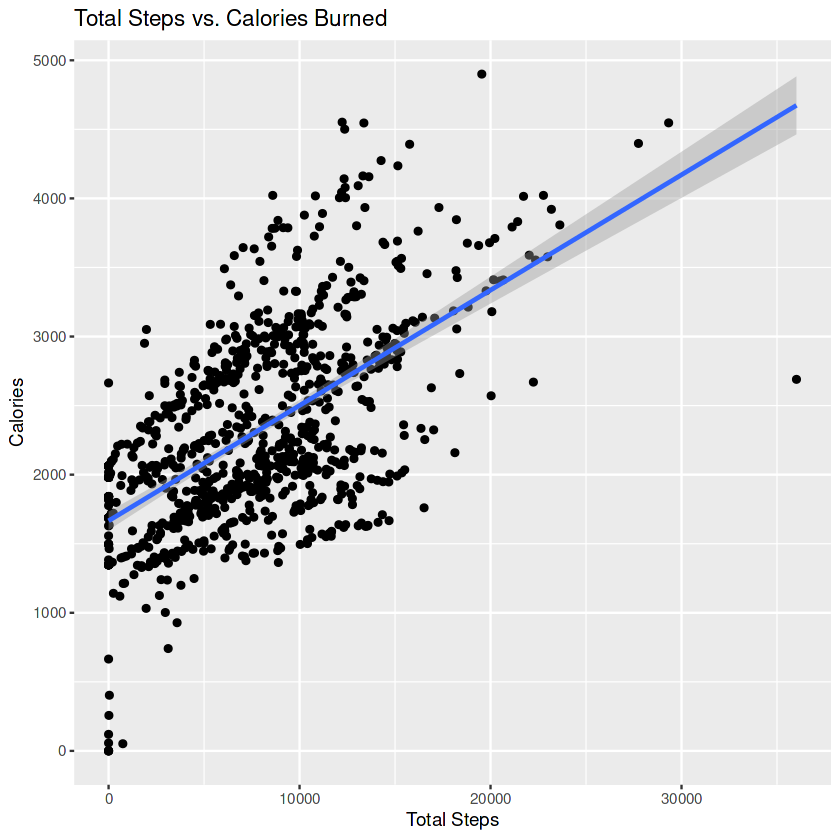

In [13]:
ggplot(data=daily_activity, aes(x=total_steps, y = calories))+ 
  geom_point()+ 
  stat_smooth(method=lm)+
  labs(title="Total Steps vs. Calories Burned", x="Total Steps", y="Calories")

In [14]:
daily_activity %>%
  summarize(cor(total_steps,calories))

"cor(total_steps, calories)"
<dbl>
0.5915681


The correlation between the daily steps taken and daily burned calories can be seen easily from the chart above.

The correlation coefficient is a statistical measure of the strength of a linear relationship between two variables. Its values can range from -1 to 1. A correlation coefficient of -1 describes a perfect negative, or inverse, correlation, with values in one series rising as those in the other decline, and vice versa. A coefficient of 1 shows a perfect positive correlation or a direct relationship. A correlation coefficient of 0 means there is no linear relationship.

In this case, the correlation coefficient is found 0.59 which also shows that there exists a positive correlation.

Now, let's create a new data frame by grouping the activities of each user.

In [15]:
users_daily_activity <- daily_activity %>%
  group_by(id) %>%
  summarize(avg_total_steps = mean(total_steps), 
            avg_sedentary_minutes = mean(sedentary_minutes), 
            avg_calories = mean(calories), 
            corr_steps_calories = cor(total_steps,calories))

#Classify them according to the activity type
users_daily_activity <- users_daily_activity %>%
  mutate(activity = case_when(
    avg_total_steps < 5000 ~ "sedentary",
    avg_total_steps >= 5000 & avg_total_steps < 7500 ~ "low active", 
    avg_total_steps >= 7500 & avg_total_steps < 10000 ~ "somewhat active", 
    avg_total_steps >= 10000 & avg_total_steps < 12500 ~ "active",
    avg_total_steps >= 12500 ~ "highly active"
  ))

glimpse(users_daily_activity)
head(users_daily_activity)

Rows: 33
Columns: 6
$ id                    <dbl> 1503960366, 1624580081, 1644430081, 1844505072, …
$ avg_total_steps       <dbl> 12116.742, 5743.903, 7282.967, 2580.065, 916.129…
$ avg_sedentary_minutes <dbl> 848.1613, 1257.7419, 1161.8667, 1206.6129, 1317.…
$ avg_calories          <dbl> 1816.419, 1483.355, 2811.300, 1573.484, 2172.806…
$ corr_steps_calories   <dbl> 0.8919450, 0.9305894, 0.9137225, 0.9166721, 0.82…
$ activity              <chr> "active", "low active", "low active", "sedentary…


id,avg_total_steps,avg_sedentary_minutes,avg_calories,corr_steps_calories,activity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,12116.742,848.1613,1816.419,0.8919450,active
1624580081,5743.903,1257.7419,1483.355,0.9305894,low active
1644430081,7282.967,1161.8667,2811.300,0.9137225,low active
1844505072,2580.065,1206.6129,1573.484,0.9166721,sedentary
1927972279,916.129,1317.4194,2172.806,0.8218038,sedentary
2022484408,11370.645,1112.5806,2509.968,0.7600246,active


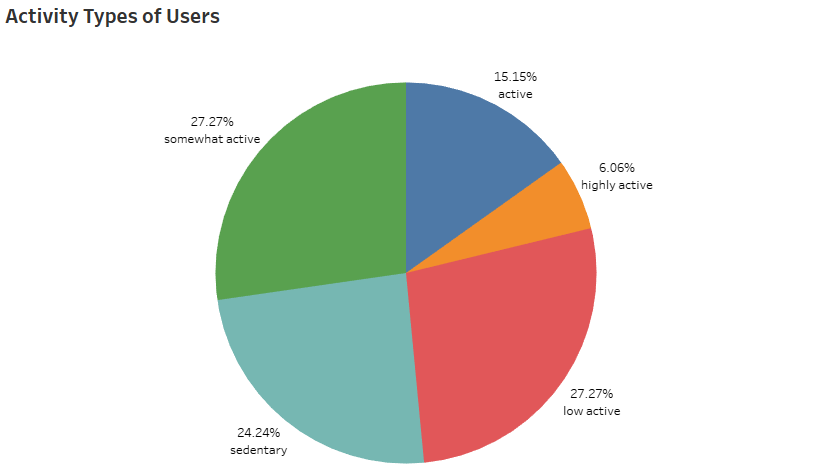

As you can see from the pie chart, only %15 of users are active and %6 of users are highly active. %24 of the users are considered sedentary which is a quite dangerous amount.

In [16]:
nrow(users_daily_activity[users_daily_activity$avg_sedentary_minutes >= 1200, ])

[1] 9

9 users, which mean %27 of all users, spend more than 20 hours of the day by sitting or lying down.<br>This is a quite dangerous statistic when we consider that sitting for long periods can lead to back pain, neck pain, and other musculoskeletal problems, as it can cause muscle imbalances and postural problems and also, it has been associated with an increased risk of colon, breast, and endometrial cancer, heart disease, and stroke. 

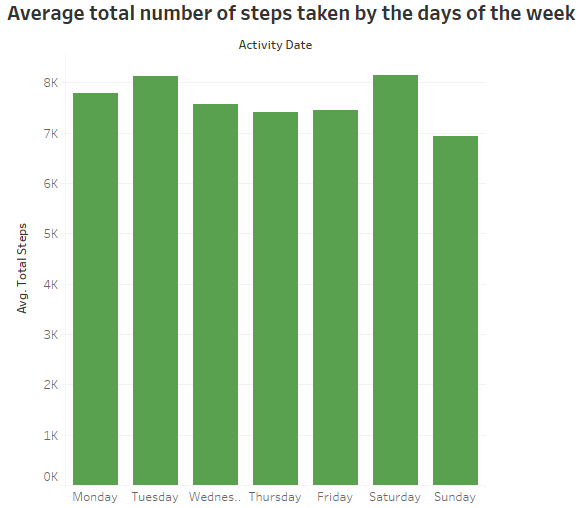

We see that Saturday is the most active day and Sunday is the least active day. Therefore, we can conclude that most of the users take Sunday to rest and Saturday for physical activities.

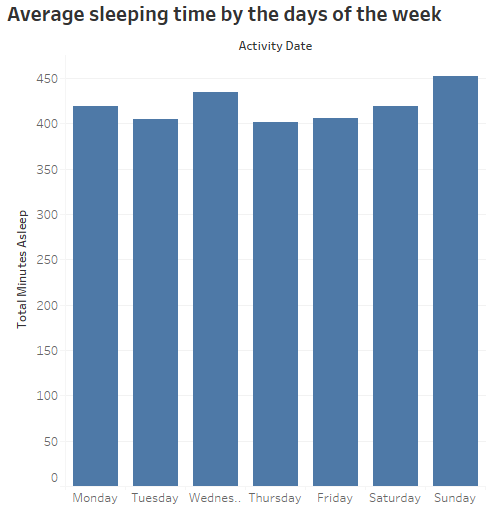

We can see that they sleep most on Sunday. That also supports our last observation that most of the users take Sundays to rest.<br>

That's also interesting to observe that sleep time is higher on Wednesdays when we compare it with other weekdays.

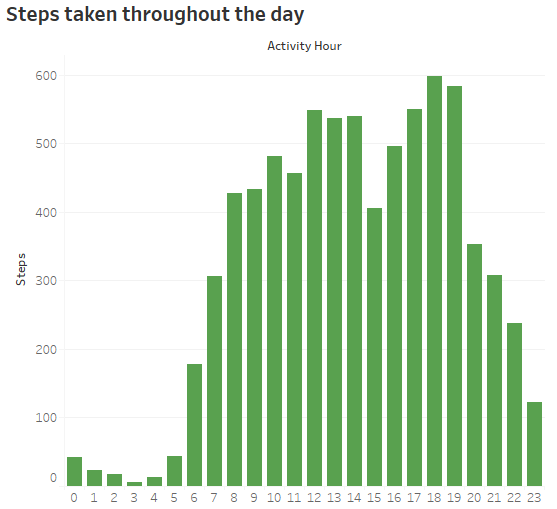

17:00 to 20:00 is the most active time range throughout the day, maybe because it is the end of the work schedule and users may prefer going to the gym or doing other activities after work.

12:00 to 15:00 is the second most active time range throughout the day. We can attribute this to having a lunch break.

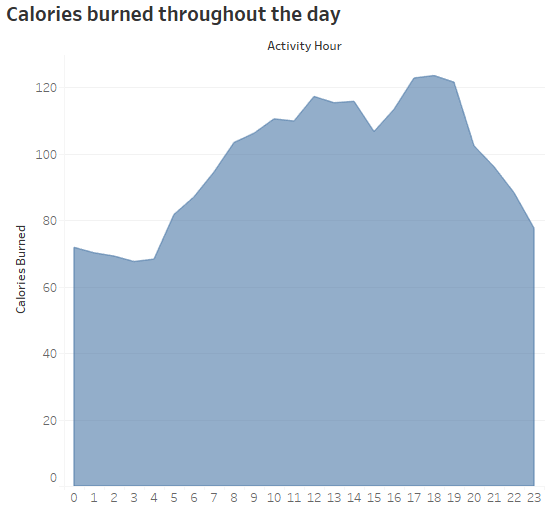

The amount of calories burned throughout the day matches the number of steps taken throughout the day. We mentioned that they correlate with each other.<br>
We can also conclude that they burn 60-80 calories hourly while they are asleep.

# Conclusion 

## Insights

* **Users take 7638 steps per day on average.** We can consider them somewhat active. However, we should courage them to take at least 10000 steps daily for an active and healthier lifestyle.<br>Taking 10000 steps a day improves cardiovascular health by strengthening the heart muscle, lowering blood pressure, and improving circulation, reducing the risk of chronic diseases such as type 2 diabetes, heart disease, and certain types of cancer. Also, physical activity can improve mood and reduce symptoms of anxiety and depression, and walking outdoors can provide additional benefits such as exposure to natural light and fresh air.

* **They burn 2304 calories per day on average.**<br>The normal amount of calories burned per day varies depending on a person's age, gender, weight, height, and level of physical activity. However, on average, an adult woman needs to burn about 2,000 calories per day, and an adult man needs to burn about 2,500 calories per day to maintain their weight. We have women-centric data so, we may consider our statistics as normal.If we collect the age, gender, weight, height, and level of physical activity data from all users, we can give advice and warn all individuals.

* On average, they are **very active for 21 minutes**, **lightly active for 192 minutes**, and **sedentary for 16,5 hours** per day.<br>Very active minutes for 21 minutes is not long enough for a healthy lifestyle. We should courage users to do at least 30 minutes of high-tension exercise. Sedentary time is also quite long but when we consider that the users may work by sitting, there is nothing to do with this.

* **They travel 5.49 kilometers per day on average.**

* **They sleep 7 hours per day on average.** For adults, 7-9 hours of sleep per day is considered ideal and healthy. So, they fit on that but they are on the boundary. 

* The more steps you take, the more calories you will burn. This is an obvious fact, but we still analyzed the data and prove this fact with a strong correlation.

* * %15 of users are active
  * %6 of users are highly active
  * %27 of the users are somewhat active
  * %27 of the users are low active 
  * %25 of the users are sedentary.
  
  **%52 of the users are considered as low active or sedentary** which is a quite dangerous statistic. We definitely should courage them with a set of activities.


* **%27 of all users spend more than 20 hours of the day by sitting or lying down.**<br>This is also a quite dangerous statistic when we consider that sitting for long periods can lead to back pain, neck pain, and other musculoskeletal problems, as it can cause muscle imbalances and postural problems and also, it has been associated with an increased risk of colon, breast, and endometrial cancer, heart disease, and stroke.

* **Saturday is the most active day, and Sunday is the least active day.** Therefore, we can conclude that most of the users take Sunday to rest and Saturday for personal activities.

* **They sleep most on Sunday.** That also supports our last conclusion that most of the users take Sundays to rest.<br>
* It is interesting that sleep time is higher on Wednesdays when we compare it with other weekdays.

* **17:00 to 20:00 is the most active time range throughout the day**, maybe because it is the end of the work schedule and users may prefer going to the gym or doing other activities after work.<br>12:00 to 15:00 is the second most active time range throughout the day. We can attribute this to having a lunch break.

* The amount of calories burned throughout the day matches the number of steps taken throughout the day. We mentioned that they correlate with each other.<br>We can also conclude that **they burn 60-80 calories hourly while they are asleep**.

## Recommendations

#### A new calorie and sleep tracking system:

&emsp;The users should be aware of the minimum sleep time they need and the minimum amount of calories they should burn according to their age, gender, weight, height, and other physical conditions. These kinds of personal information could be asked from users to inform them at that point.

&emsp;Users put information about the meals they had, and then the calories they took will be calculated. Anytime, they will be aware of whether they take more calories than they burn or vice versa. 

&emsp;Daily eating habits and activity habits suggestions will be given to the users depending on whether they should lose weight, gain weight, or stay at a stable weight.

&emsp;Furthermore, exercise programs and instructions can be added to the application to encourage users.

#### To encourage users to a more active lifestyle:
* The users could set daily steps goals. To keep users reaching these goals for the long term, a streak system could be added to the app. When the users do 7 days streak, the goal will be increased and this will keep going. In addition, an achievement system could be designed as well. The users get achievements, medals, or badges which will be shown on their profile, when they accomplish 7 days streak, 14 days streak, 1 month streak, etc.
* A league system would be a huge leap for the application. Imagine you are in a league and you compete with your family, friends, colleagues, or classmates for more activity. Every league can have different goals and the users get scores for achieving daily goals and doing streaks. Weekly leaderboards, monthly leaderboards, and all-time leaderboards can be added to the leagues. Also, a prize can be decided for the winners on a weekly or monthly basis by all of the users in the league. <br>Further, this system is quite open to improvement, new features can be added in time. <br>Last but not least, this idea plays a big role in marketing as well. We can make sure that it will bring more users.
* The users should see the comparison of themselves with the other users. <br>For example: "You are in the group of most active %30 users.", "You took %45 more steps than your age group."

#### A new notification system:<br>
* The user who sleeps less than 7 hours, or the required time according to their physical conditions, gets notifications on a daily, weekly, or monthly basis.
* The user who takes less than 7500 steps, or their goals, gets a notification at the end of the day.
* The user who stays sedentary for a long time in the daytime should get notified and motivated for at least some minimal activity. 